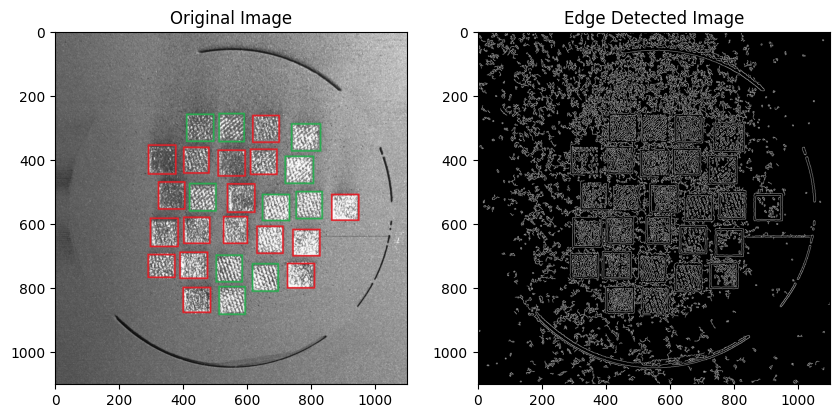

Processed and saved: NakedTop08.jpg


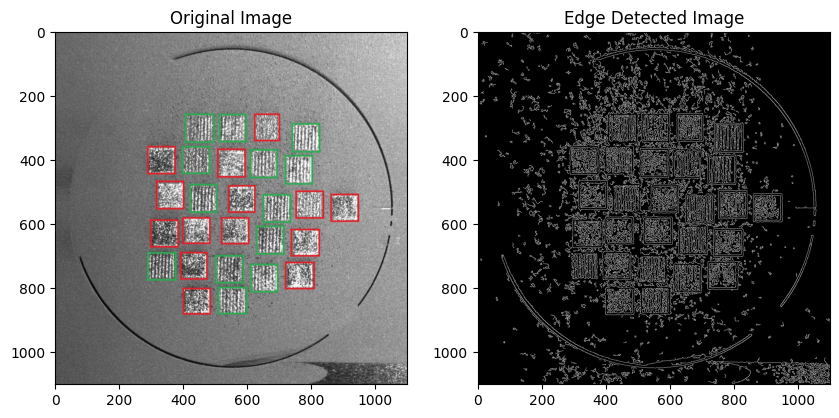

Processed and saved: NakedTop05.jpg


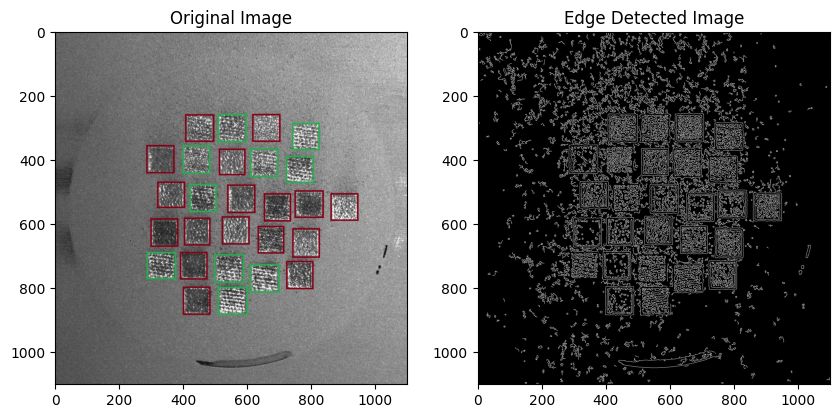

Processed and saved: NakedTop17.jpg


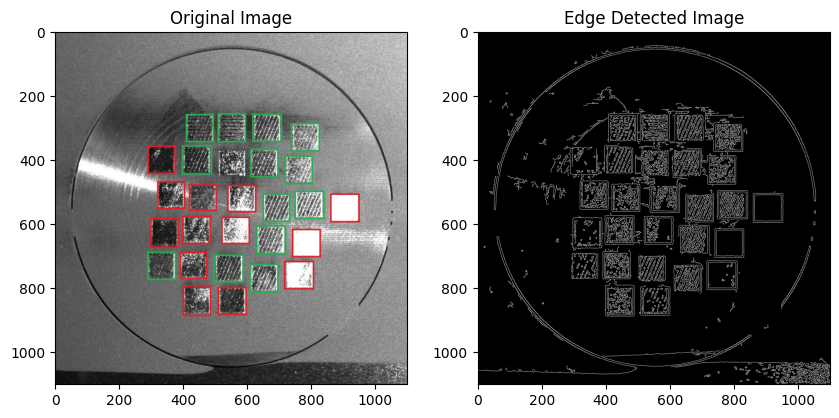

Processed and saved: NakedTop02.jpg


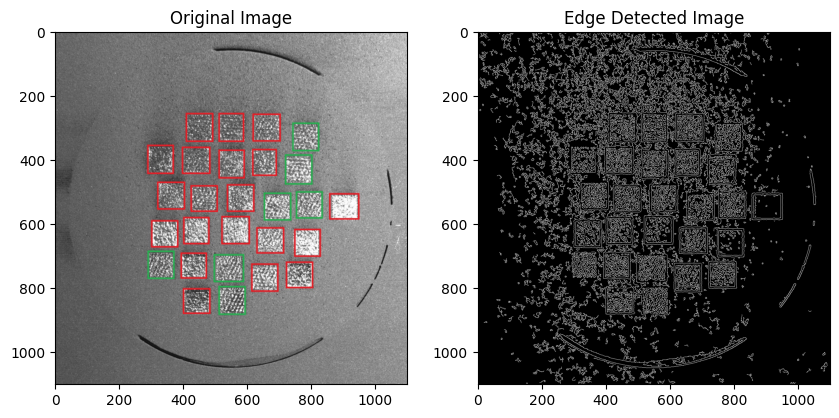

Processed and saved: NakedTop10.jpg


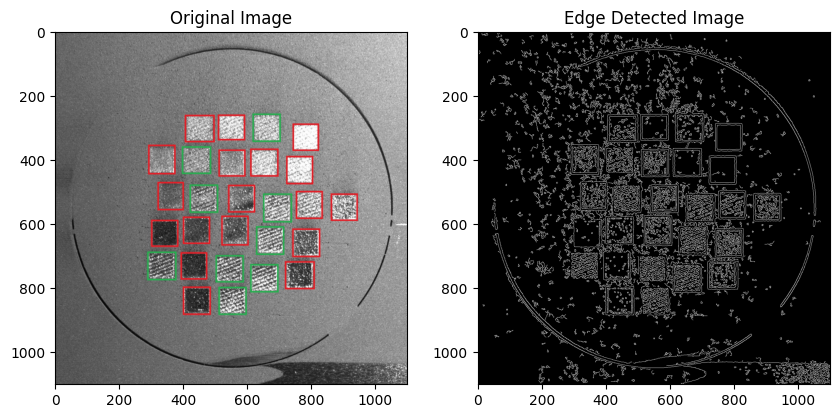

Processed and saved: NakedTop04.jpg


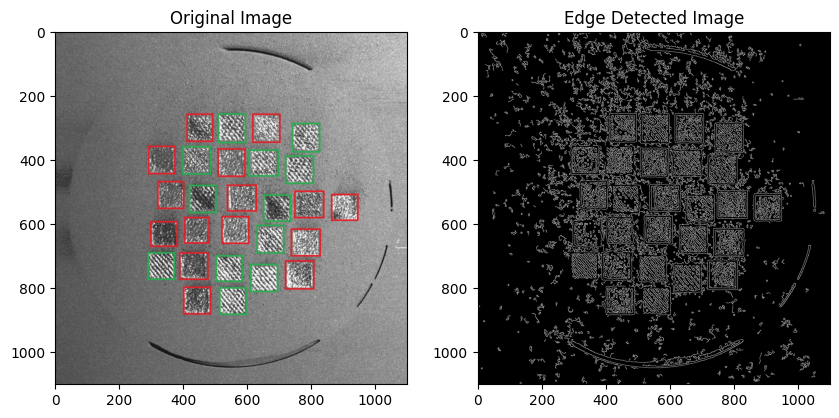

Processed and saved: NakedTop11.jpg


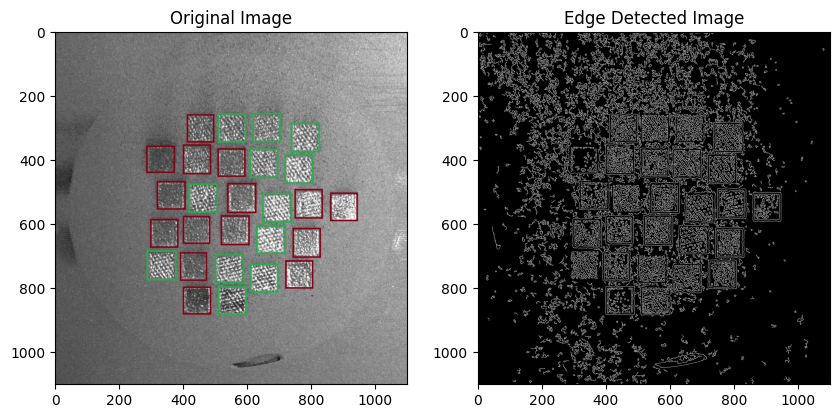

Processed and saved: NakedTop20.jpg


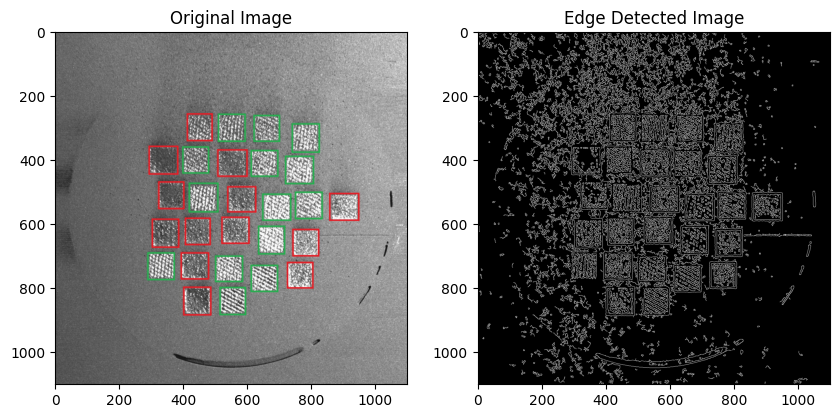

Processed and saved: NakedTop14.jpg


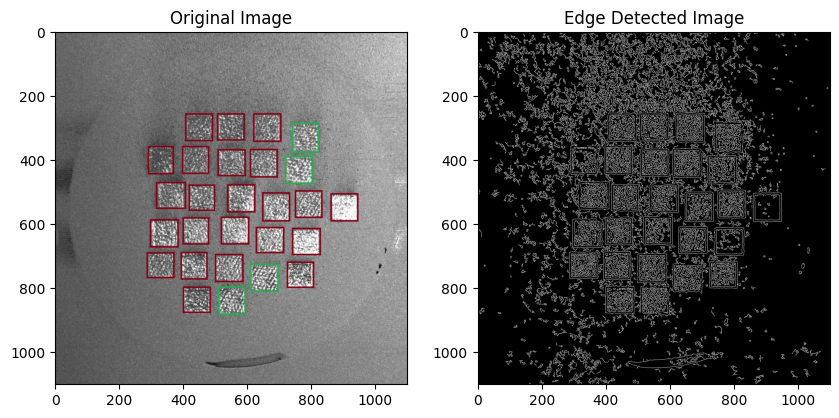

Processed and saved: NakedTop18.jpg


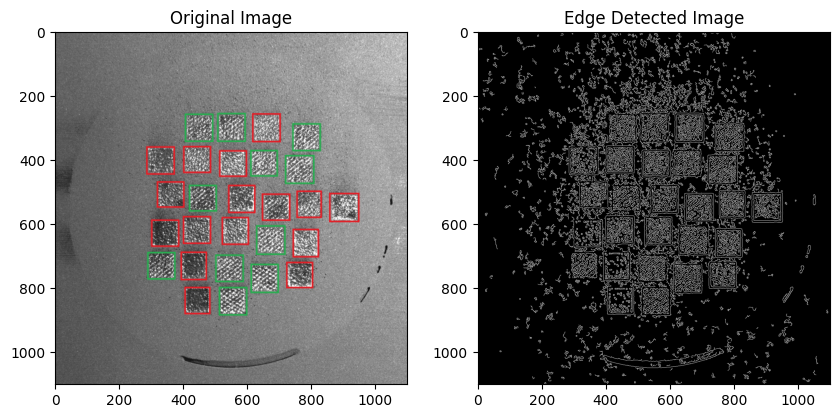

Processed and saved: NakedTop15.jpg


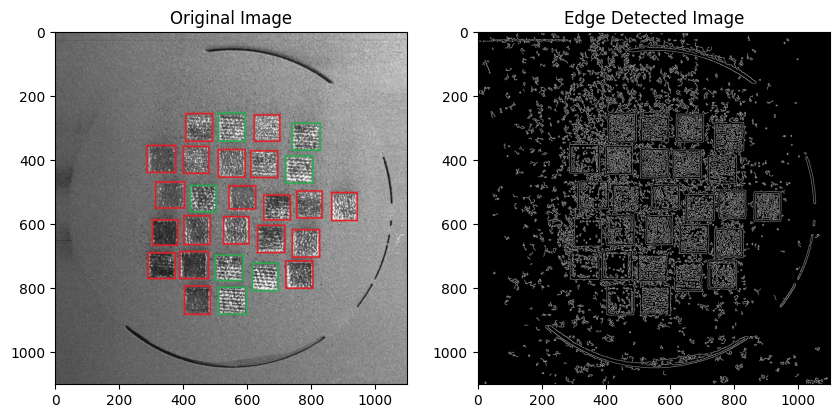

Processed and saved: NakedTop09.jpg


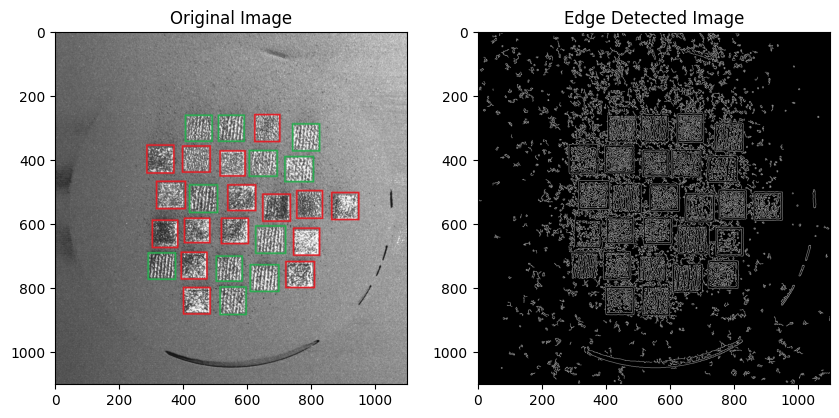

Processed and saved: NakedTop13.jpg


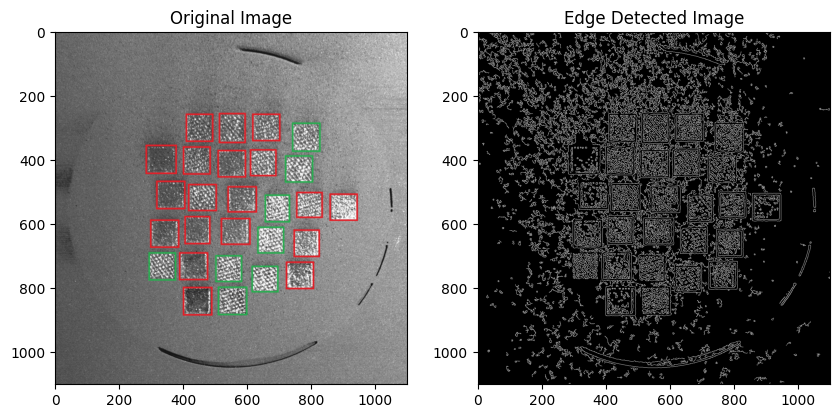

Processed and saved: NakedTop12.jpg


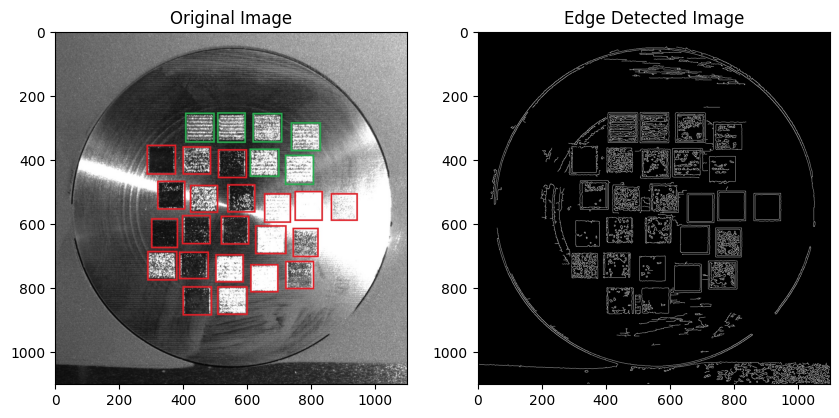

Processed and saved: NakedTop01.jpg


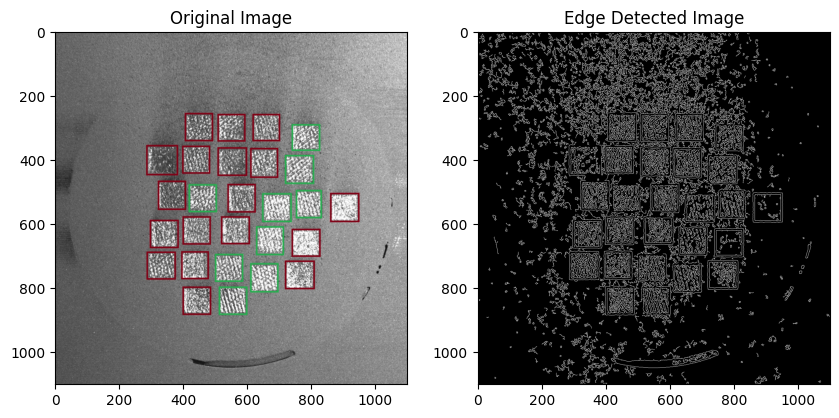

Processed and saved: NakedTop16.jpg


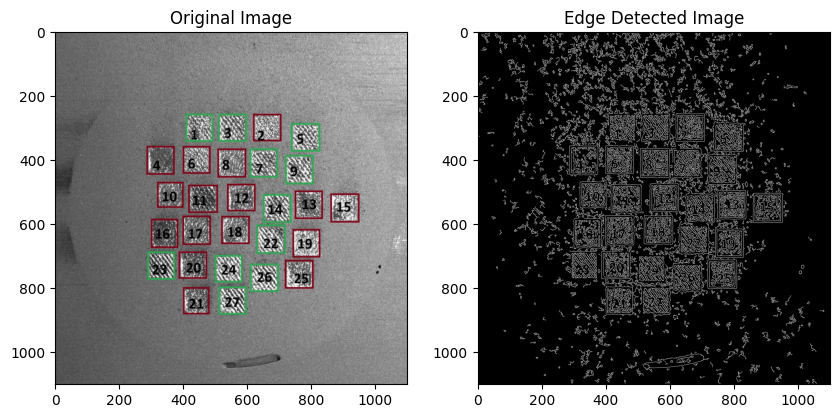

Processed and saved: NakedTop19.jpg


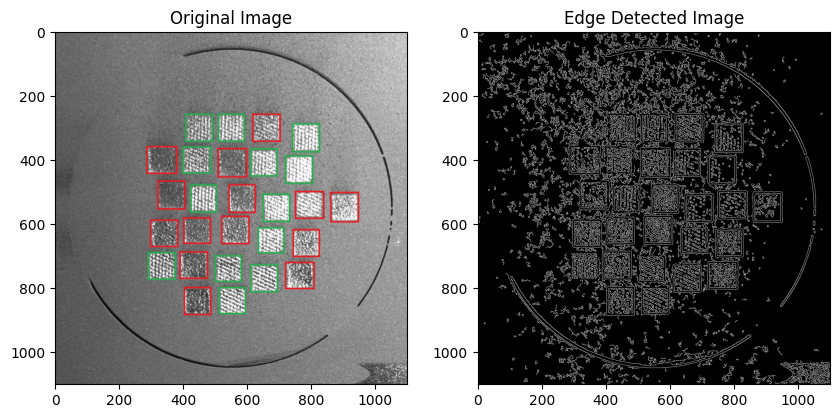

Processed and saved: NakedTop06.jpg


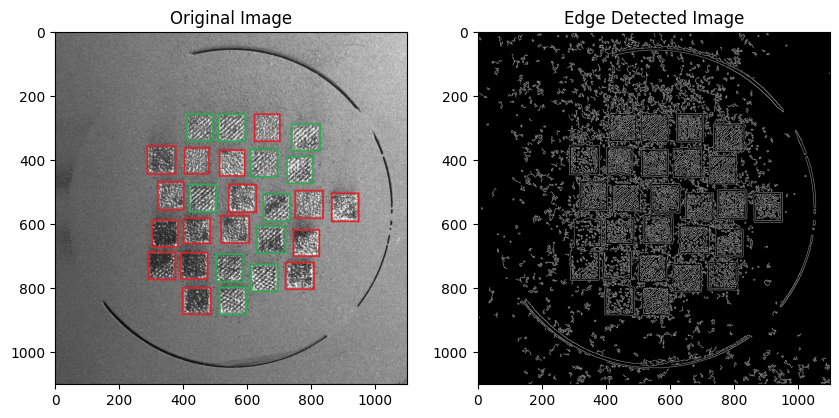

Processed and saved: NakedTop07.jpg


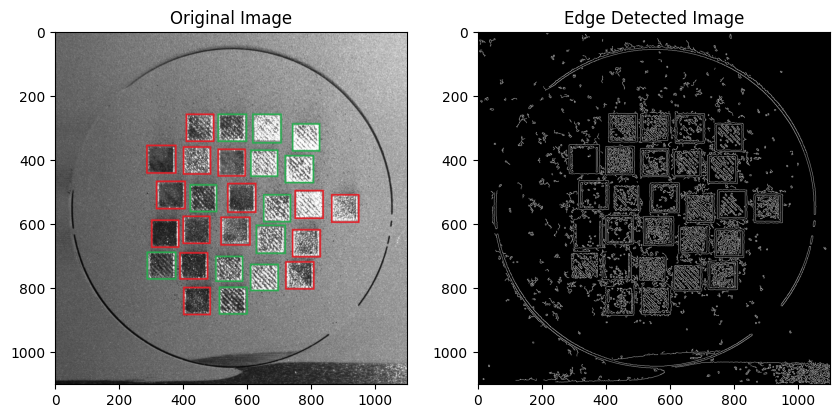

Processed and saved: NakedTop03.jpg


In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def adjust_gamma(image, gamma=1.0):
    """
    Adjust the gamma of an image.
    :param image: Input image
    :param gamma: Gamma value for correction
    :return: Gamma corrected image
    """
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(image, table)

def process_image(image):
    """
    Process the input image by applying histogram equalization, CLAHE, and edge detection.
    :param image: Input image
    :return: Processed images (gamma corrected, edge detected)
    """
    gamma_corrected = adjust_gamma(image, gamma=20)

    # Convert to grayscale
    gray = cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2GRAY)

    # Apply Histogram Equalization
    equalized = cv2.equalizeHist(gray)

    # Apply CLAHE for local contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    equalized = clahe.apply(equalized)

    # Gaussian Blur with a larger kernel for better noise reduction
    blurred = cv2.GaussianBlur(equalized, (7, 7), 0)

    # Alternatively, you can use Median Filter to reduce salt-and-pepper noise
    median_filtered = cv2.medianBlur(equalized, 5)  # Apply this if you want median filtering

    # Optionally, apply Bilateral Filtering to preserve edges
    bilateral_filtered = cv2.bilateralFilter(equalized, d=9, sigmaColor=75, sigmaSpace=75)

    # Perform edge detection using Canny
    edges = cv2.Canny(blurred, 50, 150, apertureSize=3)

    # Show the processed image
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Original Image")
    plt.subplot(1, 2, 2), plt.imshow(edges, cmap='gray'), plt.title("Edge Detected Image")
    plt.show()


    return gamma_corrected, edges

def process_directory(image_folder, output_folder_gamma, output_folder_edges):
    """
    Process all images in a directory, apply transformations, and save the results.
    :param image_folder: Directory with input images
    :param output_folder_gamma: Output directory for gamma-corrected images
    :param output_folder_edges: Output directory for edge-detected images
    """
    # Create output directories if they don't exist
    os.makedirs(output_folder_gamma, exist_ok=True)
    os.makedirs(output_folder_edges, exist_ok=True)

    # Iterate over all images in the directory
    for filename in os.listdir(image_folder):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Load the image
            img_path = os.path.join(image_folder, filename)
            image = cv2.imread(img_path)

            # Process the image (apply gamma correction and edge detection)
            gamma_corrected, edges = process_image(image)

            # Save the processed images
            gamma_corrected_path = os.path.join(output_folder_gamma, f'gamma_{filename}')
            edge_detected_path = os.path.join(output_folder_edges, f'edges_{filename}')

            # Save the images
            cv2.imwrite(gamma_corrected_path, gamma_corrected)
            cv2.imwrite(edge_detected_path, edges)

            print(f"Processed and saved: {filename}")

def display_images(image, gamma_corrected, edges):
    """
    Display the original image, gamma-corrected image, and edge-detected image.
    :param image: Original image
    :param gamma_corrected: Gamma corrected image
    :param edges: Edge detected image
    """
    plt.figure(figsize=(15, 10))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
    plt.title("Gamma Corrected Image")

    plt.subplot(1, 3, 3)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detected Image")

    plt.show()

# Define directories
image_folder = '/content'  # Replace with your input directory path
output_folder_gamma = '/content/gamma'  # Replace with your output directory path for gamma corrected images
output_folder_edges = '/content/edges'  # Replace with your output directory path for edge detected images

# Process all images in the directory
process_directory(image_folder, output_folder_gamma, output_folder_edges)


In [5]:
import os
import cv2
import numpy as np

def is_green(component):
    """
    Check if the component is green (good) based on its color.
    This function checks if the green channel has the highest intensity.
    """
    # Convert the component to HSV for better color identification
    component_hsv = cv2.cvtColor(component, cv2.COLOR_BGR2HSV)
    # Define a range for green in HSV space
    lower_green = np.array([35, 50, 50])
    upper_green = np.array([85, 255, 255])

    # Create a mask for the green color
    mask = cv2.inRange(component_hsv, lower_green, upper_green)

    # Calculate the percentage of green pixels in the component
    green_percentage = np.sum(mask) / mask.size
    return green_percentage > 0.5  # If more than 50% of the component is green, label it as good

def is_red(component):
    """
    Check if the component is red (bad) based on its color.
    This function checks if the red channel has the highest intensity.
    """
    # Convert the component to HSV for better color identification
    component_hsv = cv2.cvtColor(component, cv2.COLOR_BGR2HSV)
    # Define a range for red in HSV space
    lower_red_1 = np.array([0, 50, 50])
    upper_red_1 = np.array([10, 255, 255])
    lower_red_2 = np.array([170, 50, 50])
    upper_red_2 = np.array([180, 255, 255])

    # Create masks for the red color
    mask_red_1 = cv2.inRange(component_hsv, lower_red_1, upper_red_1)
    mask_red_2 = cv2.inRange(component_hsv, lower_red_2, upper_red_2)

    # Combine the red masks
    mask_red = cv2.bitwise_or(mask_red_1, mask_red_2)

    # Calculate the percentage of red pixels in the component
    red_percentage = np.sum(mask_red) / mask_red.size
    return red_percentage > 0.5  # If more than 50% of the component is red, label it as bad

def label_components(image_folder, coordinates_list):
    """
    Label the components in the images from the given coordinates as good (green) or bad (red).
    """
    labels = []

    # Get list of all image files in the folder
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]  # Adjust for file extensions if needed

    for image_path in image_paths:
        image = cv2.imread(image_path)

        # Iterate through each coordinate and check the color
        for coord in coordinates_list:  # Make sure each element is a tuple (x, y, w, h)
            print(coord)
            (x, y, w, h) = coord  # Unpack the tuple
            component = image[y:y+h, x:x+w]  # Extract the component from the image

            # Check if the component is green or red
            if is_green(component):
                labels.append((image_path, coord, 'Good (Green)'))
            elif is_red(component):
                labels.append((image_path, coord, 'Bad (Red)'))
            else:
                labels.append((image_path, coord, 'Other'))

    return labels

# Example usage

# Example folder with images
# Example folder with images
image_folder = '/content/'  # Change this to the path of your image folder

# Example coordinates for the 27 components in each image (example for 3 images)
coordinates_list = [(504, 795, 98, 91), (397, 794, 93, 93), (608, 726, 90, 90), (716, 716, 92, 90), (498, 695, 91, 89), (386, 687, 94, 87), (287, 685, 95, 93), (740, 613, 82, 92), (623, 604, 100, 92), (299, 583, 85, 94), (516, 574, 90, 92), (394, 572, 92, 93), (859, 505, 85, 87), (650, 504, 86, 94), (746, 498, 89, 94), (419, 478, 91, 90), (536, 477, 90, 90), (318, 466, 90, 92), (507, 368, 92, 91), (397, 359, 90, 89), (284, 354, 94, 95), (716, 385, 92, 95), (606, 366, 94, 89), (734, 284, 95, 91), (615, 255, 94, 93), (405, 254, 93, 94), (505, 253, 90, 96)]  # Coordinates for the components


# Label the components in the images
labels = label_components(image_folder, coordinates_list)

# Print the labels
for label in labels:
    print(f"Image: {label[0]}, Coordinates: {label[1]}, Label: {label[2]}")


(504, 795, 98, 91)
(397, 794, 93, 93)
(608, 726, 90, 90)
(716, 716, 92, 90)
(498, 695, 91, 89)
(386, 687, 94, 87)
(287, 685, 95, 93)
(740, 613, 82, 92)
(623, 604, 100, 92)
(299, 583, 85, 94)
(516, 574, 90, 92)
(394, 572, 92, 93)
(859, 505, 85, 87)
(650, 504, 86, 94)
(746, 498, 89, 94)
(419, 478, 91, 90)
(536, 477, 90, 90)
(318, 466, 90, 92)
(507, 368, 92, 91)
(397, 359, 90, 89)
(284, 354, 94, 95)
(716, 385, 92, 95)
(606, 366, 94, 89)
(734, 284, 95, 91)
(615, 255, 94, 93)
(405, 254, 93, 94)
(505, 253, 90, 96)
(504, 795, 98, 91)
(397, 794, 93, 93)
(608, 726, 90, 90)
(716, 716, 92, 90)
(498, 695, 91, 89)
(386, 687, 94, 87)
(287, 685, 95, 93)
(740, 613, 82, 92)
(623, 604, 100, 92)
(299, 583, 85, 94)
(516, 574, 90, 92)
(394, 572, 92, 93)
(859, 505, 85, 87)
(650, 504, 86, 94)
(746, 498, 89, 94)
(419, 478, 91, 90)
(536, 477, 90, 90)
(318, 466, 90, 92)
(507, 368, 92, 91)
(397, 359, 90, 89)
(284, 354, 94, 95)
(716, 385, 92, 95)
(606, 366, 94, 89)
(734, 284, 95, 91)
(615, 255, 94, 93)
(405, 254,

In [6]:
import pandas as pd

columns = ['Image Path', 'Coordinates', 'Category']

# Convert the list of tuples to a DataFrame
df = pd.DataFrame(labels, columns=columns)
df['Image Path'] = df['Image Path'].apply(os.path.basename)
df.loc[df['Category'] == 'Other', 'Category'] = 'Good (Green)'
df_filtered =df

In [7]:
df_filtered

Image Path         Coordinates      Category
0    NakedTop08.jpg  (504, 795, 98, 91)  Good (Green)
1    NakedTop08.jpg  (397, 794, 93, 93)     Bad (Red)
2    NakedTop08.jpg  (608, 726, 90, 90)  Good (Green)
3    NakedTop08.jpg  (716, 716, 92, 90)     Bad (Red)
4    NakedTop08.jpg  (498, 695, 91, 89)  Good (Green)
..              ...                 ...           ...
535  NakedTop03.jpg  (606, 366, 94, 89)  Good (Green)
536  NakedTop03.jpg  (734, 284, 95, 91)  Good (Green)
537  NakedTop03.jpg  (615, 255, 94, 93)  Good (Green)
538  NakedTop03.jpg  (405, 254, 93, 94)     Bad (Red)
539  NakedTop03.jpg  (505, 253, 90, 96)  Good (Green)

[540 rows x 3 columns]

In [8]:
master_df = df_filtered
master_df.to_csv('/content/master_df.csv')

In [9]:
results = {}
for image, group in master_df.groupby('Image Path'):
    coordinates_list = group['Coordinates'].tolist()
    category_list = group['Category'].tolist()
    results[image] = {
        'Coordinates': coordinates_list,
        'Categories': category_list
    }

# Display the results
for image, details in results.items():
    print(f"Image: {image}")
    print(f"Coordinates: {details['Coordinates']}")
    print(f"Categories: {details['Categories']}")
    print()

Image: NakedTop01.jpg
Coordinates: [(504, 795, 98, 91), (397, 794, 93, 93), (608, 726, 90, 90), (716, 716, 92, 90), (498, 695, 91, 89), (386, 687, 94, 87), (287, 685, 95, 93), (740, 613, 82, 92), (623, 604, 100, 92), (299, 583, 85, 94), (516, 574, 90, 92), (394, 572, 92, 93), (859, 505, 85, 87), (650, 504, 86, 94), (746, 498, 89, 94), (419, 478, 91, 90), (536, 477, 90, 90), (318, 466, 90, 92), (507, 368, 92, 91), (397, 359, 90, 89), (284, 354, 94, 95), (716, 385, 92, 95), (606, 366, 94, 89), (734, 284, 95, 91), (615, 255, 94, 93), (405, 254, 93, 94), (505, 253, 90, 96)]
Categories: ['Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Bad (Red)', 'Good (Green)', 'Good (Green)', 'Good (Green)', 'Good (Green)', 'Good (Green)', 'Good (Green)']

Image: NakedTop02.jpg
Coordinates: [(504

In [10]:
r = results.values()
for details in results.values():
  r1 = details['Coordinates']
  print(r1)
  break
coordinates_list_of_lists = r1

[(504, 795, 98, 91), (397, 794, 93, 93), (608, 726, 90, 90), (716, 716, 92, 90), (498, 695, 91, 89), (386, 687, 94, 87), (287, 685, 95, 93), (740, 613, 82, 92), (623, 604, 100, 92), (299, 583, 85, 94), (516, 574, 90, 92), (394, 572, 92, 93), (859, 505, 85, 87), (650, 504, 86, 94), (746, 498, 89, 94), (419, 478, 91, 90), (536, 477, 90, 90), (318, 466, 90, 92), (507, 368, 92, 91), (397, 359, 90, 89), (284, 354, 94, 95), (716, 385, 92, 95), (606, 366, 94, 89), (734, 284, 95, 91), (615, 255, 94, 93), (405, 254, 93, 94), (505, 253, 90, 96)]


In [11]:
labels_list_of_lists = [details['Categories'] for details in results.values()]
labels_list_of_lists

[['Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Good (Green)',
  'Good (Green)',
  'Good (Green)',
  'Good (Green)',
  'Good (Green)',
  'Good (Green)'],
 ['Bad (Red)',
  'Bad (Red)',
  'Good (Green)',
  'Bad (Red)',
  'Good (Green)',
  'Bad (Red)',
  'Good (Green)',
  'Bad (Red)',
  'Good (Green)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Good (Green)',
  'Good (Green)',
  'Bad (Red)',
  'Bad (Red)',
  'Bad (Red)',
  'Good (Green)',
  'Good (Green)',
  'Bad (Red)',
  'Good (Green)',
  'Good (Green)',
  'Good (Green)',
  'Good (Green)',
  'Good (Green)',
  'Good (Green)'],
 ['Good (Green)',
  'Bad (Red)',
  'Good (Green)',
  'Bad (Red)',
  'Good (Green)',
  'Bad (Red)',
  'Good (Green)',
  'Bad (Red

In [12]:
converted_data = [
    [1 if label == 'Good (Green)' else 0 for label in row]
    for row in labels_list_of_lists
]

# Display the converted data
print(len(converted_data))

20


In [13]:
print(coordinates_list_of_lists)

[(504, 795, 98, 91), (397, 794, 93, 93), (608, 726, 90, 90), (716, 716, 92, 90), (498, 695, 91, 89), (386, 687, 94, 87), (287, 685, 95, 93), (740, 613, 82, 92), (623, 604, 100, 92), (299, 583, 85, 94), (516, 574, 90, 92), (394, 572, 92, 93), (859, 505, 85, 87), (650, 504, 86, 94), (746, 498, 89, 94), (419, 478, 91, 90), (536, 477, 90, 90), (318, 466, 90, 92), (507, 368, 92, 91), (397, 359, 90, 89), (284, 354, 94, 95), (716, 385, 92, 95), (606, 366, 94, 89), (734, 284, 95, 91), (615, 255, 94, 93), (405, 254, 93, 94), (505, 253, 90, 96)]


SVM accuracy

In [14]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def extract_component_features(image, coordinates):
    """
    Extract features from the component region defined by coordinates in the image.
    Features could be mean color, area, and other texture-based features if needed.
    """
    x, y, w, h = coordinates
    component_image = image[y:y+h, x:x+w]

    # Compute the mean color of the component (useful for distinguishing good and bad)
    mean_color = np.mean(component_image, axis=(0, 1))  # Average color in RGB

    # Compute the area of the component (width * height)
    area = w * h

    return np.concatenate([mean_color, [area]])

def prepare_dataset(image_folder, coordinates_list, labels_list):
    """
    Prepare the dataset by extracting components from each image and preparing features and labels.
    """
    features = []
    labels = []

    # Get list of all image files in the folder
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]

    for image_path, label_set in zip(image_paths, labels_list):
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Extract features for each component in the image
        for coord, label in zip(coordinates_list, label_set):
            feature = extract_component_features(image_rgb, coord)
            features.append(feature)
            labels.append(label)

    return np.array(features), np.array(labels)

def train_svm(X_train, y_train):
    """
    Train an SVM classifier on the given features and labels.
    """
    clf = svm.SVC(kernel='linear')  # Using a linear kernel
    clf.fit(X_train, y_train)
    return clf

# Path to the folder containing edge-detected images
image_folder = '/content/edges'

# Example coordinates for components in each image
coordinates_list = coordinates_list_of_lists

# Example labels for components (1 for good, 0 for bad)
labels_list = converted_data

# Prepare the dataset
X, y = prepare_dataset(image_folder, coordinates_list, labels_list)

# Ensure y is 1-dimensional
y = y.ravel()

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print class distribution for verification
print("Class distribution in y_train:", np.unique(y_train, return_counts=True))
print("Class distribution in y_test:", np.unique(y_test, return_counts=True))

# Train the SVM classifier
clf = train_svm(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

Class distribution in y_train: (array([0, 1]), array([269, 163]))
Class distribution in y_test: (array([0, 1]), array([67, 41]))


In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

Model Accuracy: 64.81%
Precision: 63.64%
Recall: 17.07%


In [16]:
# Example of classifying new image components
new_image_path = '/content/NakedTop19.jpg'
new_coordinates_list = coordinates_list_of_lists

# Load and process the new image
new_image = cv2.imread(new_image_path)
new_image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

# Extract features for the new image components and predict
predictions = []
for coord in new_coordinates_list:
    feature = extract_component_features(new_image_rgb, coord)
    prediction = clf.predict([feature])
    predictions.append(prediction[0])

# Output predictions
for i, (prediction, actul) in enumerate(zip(predictions, labels_list[18])):
    print(f"Component {i+1}: {'Good' if prediction == 1 else 'Bad'} , Actual: {'Good' if actul == 1 else 'Bad'}")

# Calculate accuracy, precision, and recall for the new image
accuracy_new = accuracy_score(labels_list[18], predictions)
precision_new = precision_score(labels_list[18], predictions, zero_division=0)
recall_new = recall_score(labels_list[18], predictions, zero_division=0)

print(f"New Image Accuracy: {accuracy_new * 100:.2f}%")
print(f"New Image Precision: {precision_new * 100:.2f}%")
print(f"New Image Recall: {recall_new * 100:.2f}%")

Component 1: Good , Actual: Good
Component 2: Bad , Actual: Bad
Component 3: Bad , Actual: Good
Component 4: Bad , Actual: Bad
Component 5: Bad , Actual: Good
Component 6: Bad , Actual: Bad
Component 7: Good , Actual: Good
Component 8: Bad , Actual: Bad
Component 9: Good , Actual: Good
Component 10: Bad , Actual: Bad
Component 11: Bad , Actual: Bad
Component 12: Bad , Actual: Bad
Component 13: Bad , Actual: Bad
Component 14: Bad , Actual: Good
Component 15: Bad , Actual: Bad
Component 16: Bad , Actual: Bad
Component 17: Bad , Actual: Bad
Component 18: Bad , Actual: Bad
Component 19: Bad , Actual: Bad
Component 20: Bad , Actual: Bad
Component 21: Good , Actual: Bad
Component 22: Bad , Actual: Good
Component 23: Bad , Actual: Good
Component 24: Bad , Actual: Good
Component 25: Bad , Actual: Bad
Component 26: Bad , Actual: Good
Component 27: Bad , Actual: Good
New Image Accuracy: 66.67%
New Image Precision: 75.00%
New Image Recall: 27.27%


SVM mIoU

In [17]:
import numpy as np
import cv2

# Function to compute IoU (Intersection over Union)
def compute_iou(pred_bbox, gt_bbox):
    # Calculate the (x, y)-coordinates of the intersection rectangle
    x1_intersection = max(pred_bbox[0], gt_bbox[0])
    y1_intersection = max(pred_bbox[1], gt_bbox[1])
    x2_intersection = min(pred_bbox[0] + pred_bbox[2], gt_bbox[0] + gt_bbox[2])
    y2_intersection = min(pred_bbox[1] + pred_bbox[3], gt_bbox[1] + gt_bbox[3])

    # Compute area of intersection
    intersection_width = max(0, x2_intersection - x1_intersection)
    intersection_height = max(0, y2_intersection - y1_intersection)
    intersection_area = intersection_width * intersection_height

    # Compute area of both bounding boxes
    pred_area = pred_bbox[2] * pred_bbox[3]  # width * height
    gt_area = gt_bbox[2] * gt_bbox[3]  # width * height

    # Compute area of union
    union_area = pred_area + gt_area - intersection_area

    # Compute IoU
    iou = intersection_area / union_area if union_area != 0 else 0
    return iou

# Function to calculate mIoU for multiple components
def evaluate_miou(pred_bboxes, gt_bboxes):
    assert len(pred_bboxes) == len(gt_bboxes), "Predicted and ground truth bounding boxes must have the same length."

    # Compute IoU for each pair of predicted and ground truth bounding boxes
    iou_scores = []
    for pred_bbox, gt_bbox in zip(pred_bboxes, gt_bboxes):
        iou = compute_iou(pred_bbox, gt_bbox)
        iou_scores.append(iou)

    # Compute mean IoU
    mean_iou = np.mean(iou_scores)
    return mean_iou

# Example usage
# Predicted bounding boxes (x, y, width, height)
pred_bboxes = [(50, 50, 100, 100), (200, 200, 100, 100), (400, 400, 100, 100)]  # Example predicted boxes

# Ground truth bounding boxes (x, y, width, height)
gt_bboxes = [(60, 60, 100, 100), (210, 210, 100, 100), (390, 390, 100, 100)]  # Example ground truth boxes

# Evaluate mIoU
miou = evaluate_miou(pred_bboxes, gt_bboxes)
print(f"Mean IoU: {miou:.4f}")


Mean IoU: 0.6807


Random Forest

In [18]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

def extract_component_features(image, coordinates):
    """
    Extract features from the component region defined by coordinates in the image.
    Features could be mean color, area, and other texture-based features if needed.
    """
    x, y, w, h = coordinates
    component_image = image[y:y+h, x:x+w]

    # Compute the mean color of the component (useful for distinguishing good and bad)
    mean_color = np.mean(component_image, axis=(0, 1))  # Average color in RGB

    # Compute the area of the component (width * height)
    area = w * h

    return np.concatenate([mean_color, [area]])

def prepare_dataset(image_folder, coordinates_list, labels_list):
    """
    Prepare the dataset by extracting components from each image and preparing features and labels.
    """
    features = []
    labels = []

    # Get list of all image files in the folder
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]

    for image_path, label_set in zip(image_paths, labels_list):
        image = cv2.imread(image_path)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB

        # Extract features for each component in the image
        for coord, label in zip(coordinates_list, label_set):
            feature = extract_component_features(image_rgb, coord)
            features.append(feature)
            labels.append(label)

    return np.array(features), np.array(labels)

def train_random_forest(X_train, y_train):
    """
    Train a Random Forest classifier on the given features and labels.
    """
    clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees
    clf.fit(X_train, y_train)
    return clf

# Path to the folder containing edge-detected images
image_folder = '/content/edges'

# Example coordinates for components in each image
coordinates_list = coordinates_list_of_lists

# Example labels for components (1 for good, 0 for bad)
labels_list = converted_data

# Prepare the dataset
X, y = prepare_dataset(image_folder, coordinates_list, labels_list)

# Ensure y is 1-dimensional
y = y.ravel()

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print class distribution for verification
print("Class distribution in y_train:", np.unique(y_train, return_counts=True))
print("Class distribution in y_test:", np.unique(y_test, return_counts=True))

# Train the Random Forest classifier
clf = train_random_forest(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

# Example of classifying new image components
new_image_path = '/content/NakedTop19.jpg'
new_coordinates_list = coordinates_list_of_lists

# Load and process the new image
new_image = cv2.imread(new_image_path)
new_image_rgb = cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB)

# Extract features for the new image components and predict
predictions = []
for coord in new_coordinates_list:
    feature = extract_component_features(new_image_rgb, coord)
    prediction = clf.predict([feature])
    predictions.append(prediction[0])

# Output predictions
for i, (prediction, actual) in enumerate(zip(predictions, labels_list[18])):
    print(f"Component {i+1}: {'Good' if prediction == 1 else 'Bad'} , Actual: {'Good' if actual == 1 else 'Bad'}")

# Calculate accuracy, precision, and recall for the new image
accuracy_new = accuracy_score(labels_list[18], predictions)
precision_new = precision_score(labels_list[18], predictions, zero_division=0)
recall_new = recall_score(labels_list[18], predictions, zero_division=0)

print(f"New Image Accuracy: {accuracy_new * 100:.2f}%")
print(f"New Image Precision: {precision_new * 100:.2f}%")
print(f"New Image Recall: {recall_new * 100:.2f}%")


Class distribution in y_train: (array([0, 1]), array([269, 163]))
Class distribution in y_test: (array([0, 1]), array([67, 41]))
Model Accuracy: 72.22%
Precision: 64.10%
Recall: 60.98%
Component 1: Bad , Actual: Good
Component 2: Bad , Actual: Bad
Component 3: Good , Actual: Good
Component 4: Good , Actual: Bad
Component 5: Good , Actual: Good
Component 6: Good , Actual: Bad
Component 7: Bad , Actual: Good
Component 8: Bad , Actual: Bad
Component 9: Bad , Actual: Good
Component 10: Bad , Actual: Bad
Component 11: Good , Actual: Bad
Component 12: Good , Actual: Bad
Component 13: Bad , Actual: Bad
Component 14: Good , Actual: Good
Component 15: Good , Actual: Bad
Component 16: Good , Actual: Bad
Component 17: Good , Actual: Bad
Component 18: Good , Actual: Bad
Component 19: Good , Actual: Bad
Component 20: Good , Actual: Bad
Component 21: Bad , Actual: Bad
Component 22: Good , Actual: Good
Component 23: Good , Actual: Good
Component 24: Good , Actual: Good
Component 25: Bad , Actual: Bad

In [ ]:
import numpy as np
import cv2

# Function to compute IoU (Intersection over Union)
def compute_iou(pred_bbox, gt_bbox):
    # Calculate the (x, y)-coordinates of the intersection rectangle
    x1_intersection = max(pred_bbox[0], gt_bbox[0])
    y1_intersection = max(pred_bbox[1], gt_bbox[1])
    x2_intersection = min(pred_bbox[0] + pred_bbox[2], gt_bbox[0] + gt_bbox[2])
    y2_intersection = min(pred_bbox[1] + pred_bbox[3], gt_bbox[1] + gt_bbox[3])

    # Compute area of intersection
    intersection_width = max(0, x2_intersection - x1_intersection)
    intersection_height = max(0, y2_intersection - y1_intersection)
    intersection_area = intersection_width * intersection_height

    # Compute area of both bounding boxes
    pred_area = pred_bbox[2] * pred_bbox[3]  # width * height
    gt_area = gt_bbox[2] * gt_bbox[3]  # width * height

    # Compute area of union
    union_area = pred_area + gt_area - intersection_area

    # Compute IoU
    iou = intersection_area / union_area if union_area != 0 else 0
    return iou

# Function to calculate mIoU for multiple components
def evaluate_miou(pred_bboxes, gt_bboxes):
    assert len(pred_bboxes) == len(gt_bboxes), "Predicted and ground truth bounding boxes must have the same length."

    # Compute IoU for each pair of predicted and ground truth bounding boxes
    iou_scores = []
    for pred_bbox, gt_bbox in zip(pred_bboxes, gt_bboxes):
        iou = compute_iou(pred_bbox, gt_bbox)
        iou_scores.append(iou)

    # Compute mean IoU
    mean_iou = np.mean(iou_scores)
    return mean_iou

# Example usage
# Predicted bounding boxes (x, y, width, height)
pred_bboxes = [(50, 50, 100, 100), (200, 200, 100, 100), (400, 400, 100, 100)]  # Example predicted boxes

# Ground truth bounding boxes (x, y, width, height)
gt_bboxes = [(60, 60, 100, 100), (210, 210, 100, 100), (390, 390, 100, 100)]  # Example ground truth boxes



In [22]:
# Evaluate mIoU
miou = evaluate_miou(pred_bboxes, gt_bboxes)
print(f"Mean IoU: {miou:.4f}")

Mean IoU: 0.7636
